# Modelos Multivariados con Python

## 1. Vectores Autorregresivos - VAR

In [ ]:
# Para el modelamiento
from statsmodels.tsa.api import VAR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Para obtener la data
import statsmodels.api as sm

In [ ]:
# import statsmodels.api.datasets.macrodata as macro
# objeto = macro.load()
# Objeto.data (objeto.atributo)
mdata=sm.datasets.macrodata.load().data
mdata

/usr/local/lib/python3.7/dist-packages/statsmodels/datasets/utils.py:337: FutureWarning: load will return datasets containing pandas DataFrames and Series in the Future.  To suppress this message, specify as_pandas=False
  FutureWarning)


rec.array([(1959., 1.,  2710.349, 1707.4,  286.898,  470.045,  1886.9,  28.98 ,  139.7,  2.82,  5.8, 177.146,  0.  ,  0.  ),
           (1959., 2.,  2778.801, 1733.7,  310.859,  481.301,  1919.7,  29.15 ,  141.7,  3.08,  5.1, 177.83 ,  2.34,  0.74),
           (1959., 3.,  2775.488, 1751.8,  289.226,  491.26 ,  1916.4,  29.35 ,  140.5,  3.82,  5.3, 178.657,  2.74,  1.09),
           (1959., 4.,  2785.204, 1753.7,  299.356,  484.052,  1931.3,  29.37 ,  140. ,  4.33,  5.6, 179.386,  0.27,  4.06),
           (1960., 1.,  2847.699, 1770.5,  331.722,  462.199,  1955.5,  29.54 ,  139.6,  3.5 ,  5.2, 180.007,  2.31,  1.19),
           (1960., 2.,  2834.39 , 1792.9,  298.152,  460.4  ,  1966.1,  29.55 ,  140.2,  2.68,  5.2, 180.671,  0.14,  2.55),
           (1960., 3.,  2839.022, 1785.8,  296.375,  474.676,  1967.8,  29.75 ,  140.9,  2.36,  5.6, 181.528,  2.7 , -0.34),
           (1960., 4.,  2802.616, 1788.2,  259.764,  476.434,  1966.6,  29.84 ,  141.1,  2.29,  6.3, 182.287,  1.21,  1.08),


### a) Preprocesamiento

In [ ]:
import pandas as pd

In [ ]:
# Convertir el array en DataFrame
mdata=pd.DataFrame(mdata[["realgdp","realcons","realinv"]])
mdata

,realgdp,realcons,realinv
0,2710.349,1707.4,286.898
1,2778.801,1733.7,310.859
2,2775.488,1751.8,289.226
3,2785.204,1753.7,299.356
4,2847.699,1770.5,331.722
...,...,...,...
198,13324.600,9267.7,1990.693
199,13141.920,9195.3,1857.661
200,12925.410,9209.2,1558.494
201,12901.504,9189.0,1456.678


In [ ]:
# Definir la Índice en formato de serie de tiempo
## Pandas: función Index
## sm.tsa: Statsmodels para serie de tiempo, modulo datetools -> método o función date_from_range()

## Programación funcional: función1(función2(función3()))
### función3() -> objeto de clase fit
### función2(objeto fit) -> objeto de clase VAR_estimate
### función3(objeto VAR_estimate) -> objeto IRF

mdata.index=pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))
mdata

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722
...,...,...,...
2008-09-30,13324.600,9267.7,1990.693
2008-12-31,13141.920,9195.3,1857.661
2009-03-31,12925.410,9209.2,1558.494
2009-06-30,12901.504,9189.0,1456.678


In [ ]:
mdata.columns

Index(['realgdp', 'realcons', 'realinv'], dtype='object')

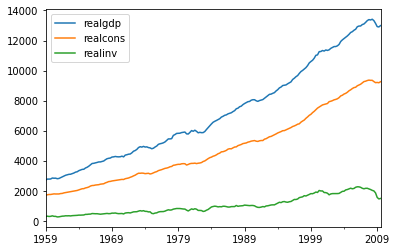

In [ ]:
mdata.plot()

In [ ]:
import numpy as np

In [ ]:
# Programación orientada a objeto
# Objeto1.Objeto2.Objeto3
# Objeto1= data
# Metodo(Objeto1) -> Objeto1_1
# Objeto1_1.objeto2 -> Objeto2_1
# Objeto2 = función : diff()
# Objeto2_1.Objeto3
# Objeto3 = función : dropna()

data=np.log(mdata).diff().dropna()
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


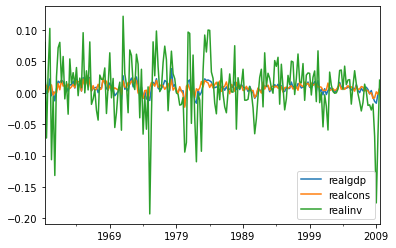

In [ ]:
data.plot()

In [ ]:
help(VAR)
# VAR crea un objeto
# Objeto VAR.metodo()
# Objeto VAR.fit()
# Objeto VAR.predict()
# Objeto VAR.select_order()

# Objeto VAR_fit = VAR.fit()
# Objeto VAR_fit.summary()

## b) Especificación y estimación

In [ ]:
# Especifico el VAR
var=VAR(data)
var

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [ ]:
var.select_order(5).summary()

,AIC,BIC,FPE,HQIC
0,-27.68,-27.63,9.540e-13,-27.66
1,-28.01*,-27.81*,6.847e-13*,-27.93*
2,-27.98,-27.63,7.023e-13,-27.84
3,-27.99,-27.49,7.002e-13,-27.79
4,-27.99,-27.34,6.986e-13,-27.73
5,-27.97,-27.17,7.107e-13,-27.65


In [ ]:
# Fitear (estimar) el modelo
var.fit().summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Sep, 2021
Time:                     23:03:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.7388
Nobs:                     201.000    HQIC:                  -27.8562
Log likelihood:           1963.94    FPE:                7.37174e-13
AIC:                     -27.9360    Det(Omega_mle):     6.94859e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.003580         0.000911            3.928           0.000
L1.realgdp         -0.338056         0.172084           -1.964           0.049
L1.realcons         0.746283         0.130411            5.723    

In [ ]:
var1=VAR(data).fit(maxlags=1)
var1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [ ]:
var1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Sep, 2021
Time:                     23:04:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.7388
Nobs:                     201.000    HQIC:                  -27.8562
Log likelihood:           1963.94    FPE:                7.37174e-13
AIC:                     -27.9360    Det(Omega_mle):     6.94859e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.003580         0.000911            3.928           0.000
L1.realgdp         -0.338056         0.172084           -1.964           0.049
L1.realcons         0.746283         0.130411            5.723    

## Post evaluación

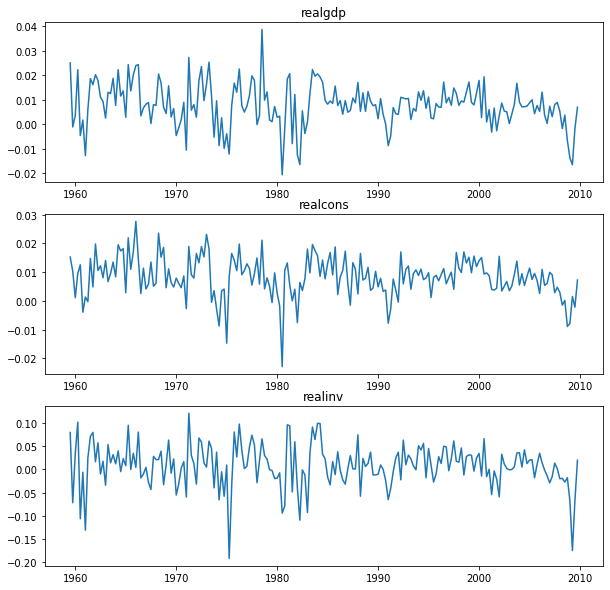

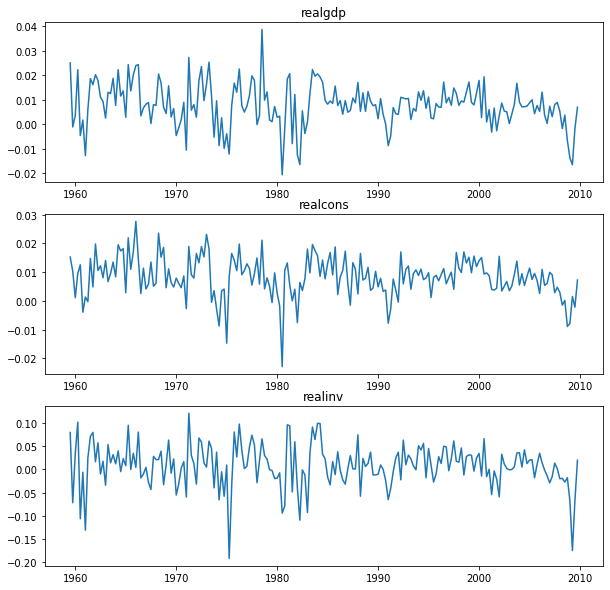

In [ ]:
# VAR_fit.metodo()
var1.plot()

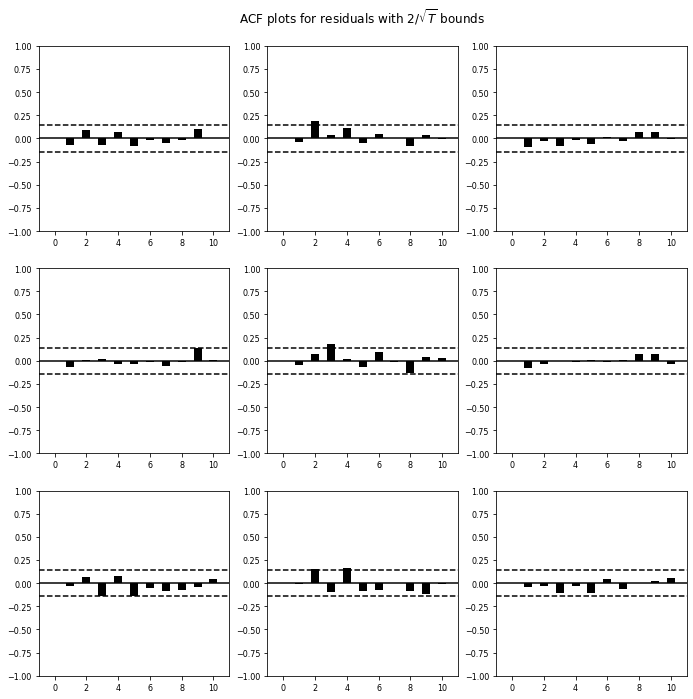

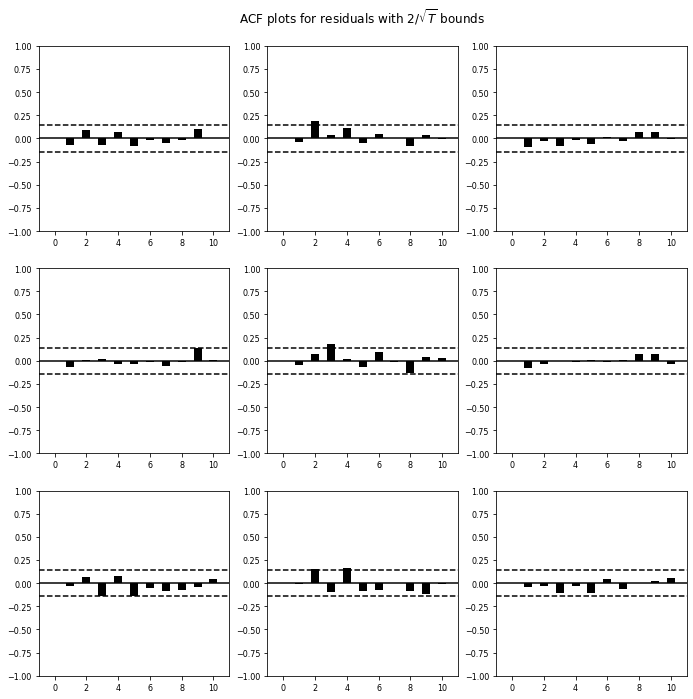

In [ ]:
var1.plot_acorr()

In [ ]:
var1.test_normality().summary()

Test statistic,Critical value,p-value,df
28.71,12.59,0.000,6


## 2) Función impulso respuesta

In [ ]:
help(var1.test_causality)

#####  
$ H_0:\beta_{realcons} =  \beta_{realinv}=0 $ \\
$ H_1: \beta_{realcons} \neq  \beta_{realinv} \neq 0$

In [ ]:
# Test de causalidad a lo Granger (kind: test tipo F)
# H0: realcons, realinv no causan a lo Granger a realgdp
# H1: realcons, realinv causan a lo Granger a realgdp

var1.test_causality(caused="realgdp", causing=["realcons","realinv"], kind="f").summary()

Test statistic,Critical value,p-value,df
17.42,3.011,0.000,"(2, 591)"


In [ ]:
var1.test_causality("realcons",["realgdp","realinv"],kind="f").summary()

Test statistic,Critical value,p-value,df
3.408,3.011,0.034,"(2, 591)"


In [ ]:
var1.test_causality("realinv",["realgdp","realcons"],kind="f").summary()

Test statistic,Critical value,p-value,df
32.53,3.011,0.000,"(2, 591)"


In [ ]:
var1.test_causality('realinv', ['realgdp', 'realcons'],kind="wald").summary()

Test statistic,Critical value,p-value,df
65.06,5.991,0.000,2


In [ ]:
# Objeto VAR_fit.metodo()
irf=var1.irf(12)
irf.__class__

statsmodels.tsa.vector_ar.irf.IRAnalysis

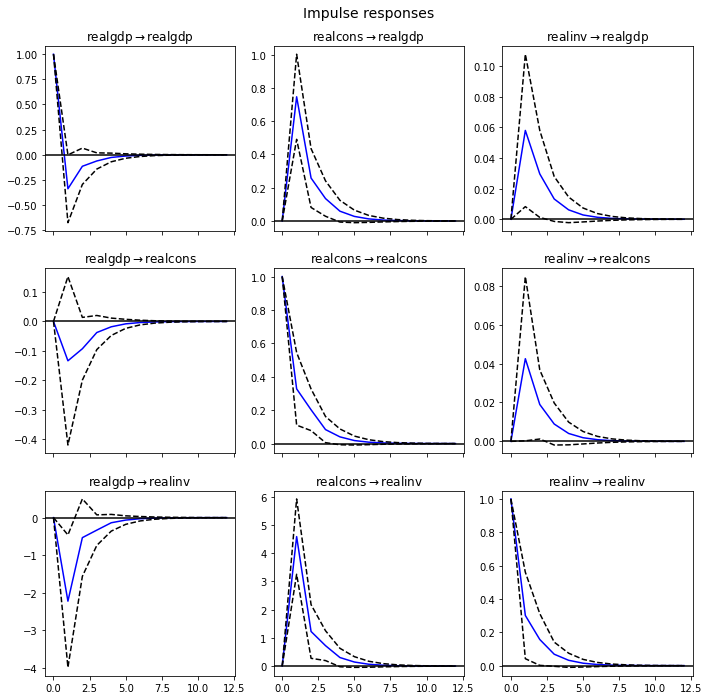

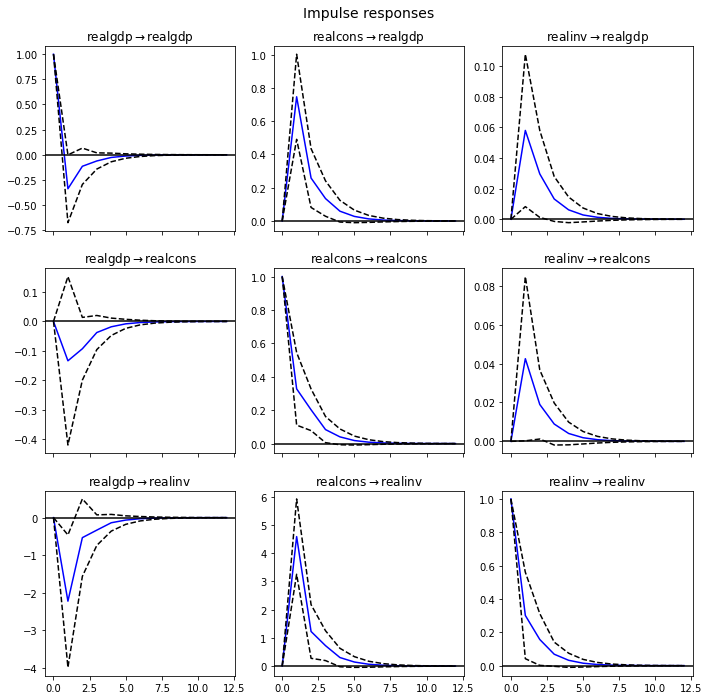

In [ ]:
# Objeto irf = statsmodels.tsa.vector_ar.irf.IRAnalysis
irf.plot()

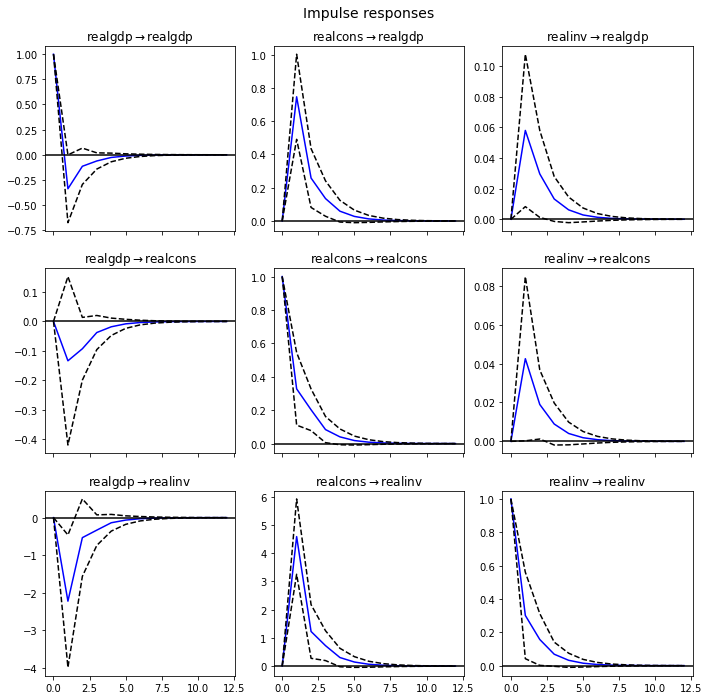

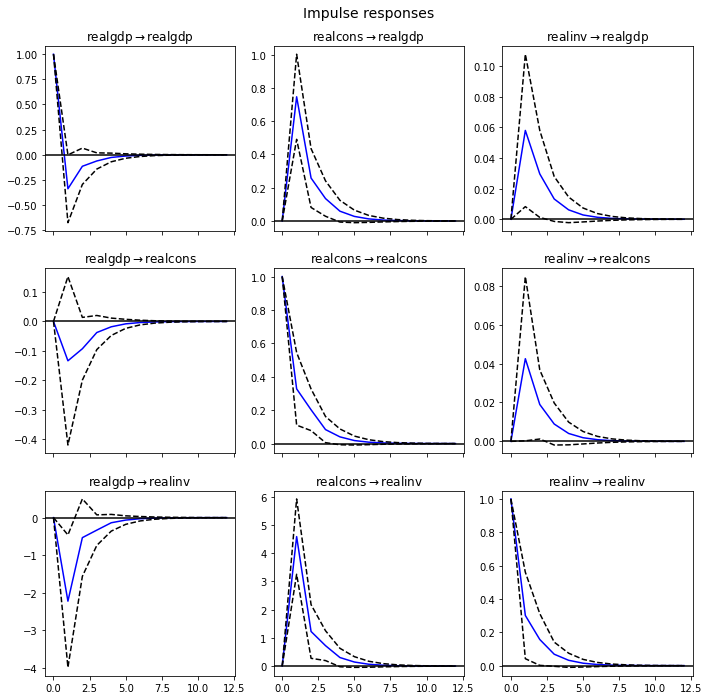

In [ ]:
irf.plot(orth=False)

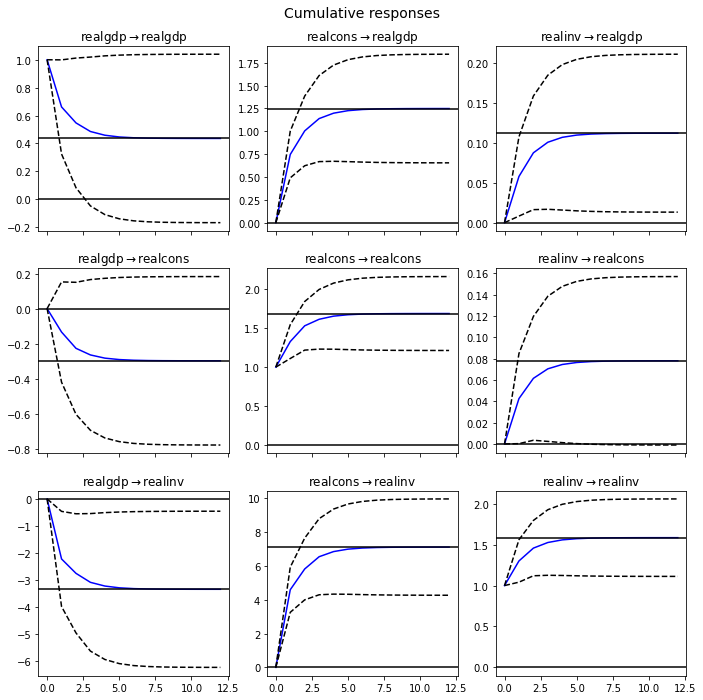

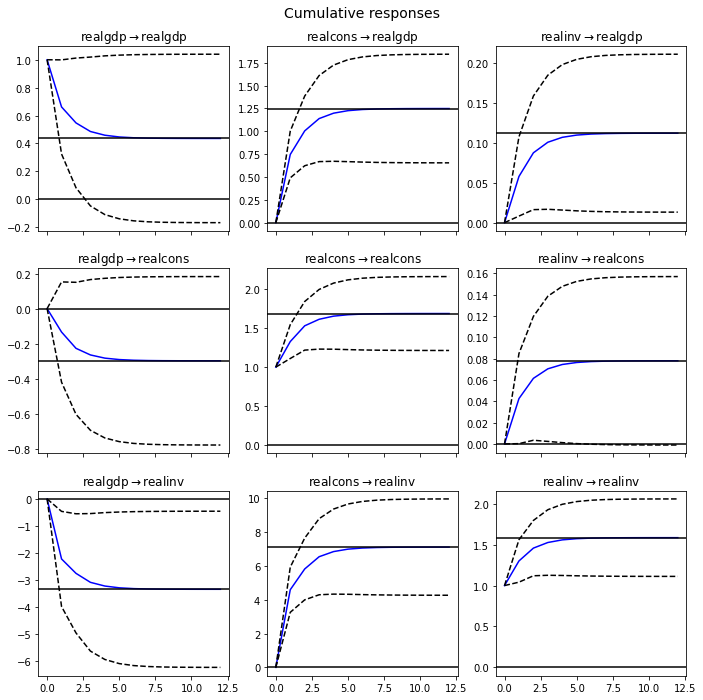

In [ ]:
irf.plot_cum_effects()

## 3) Proyección

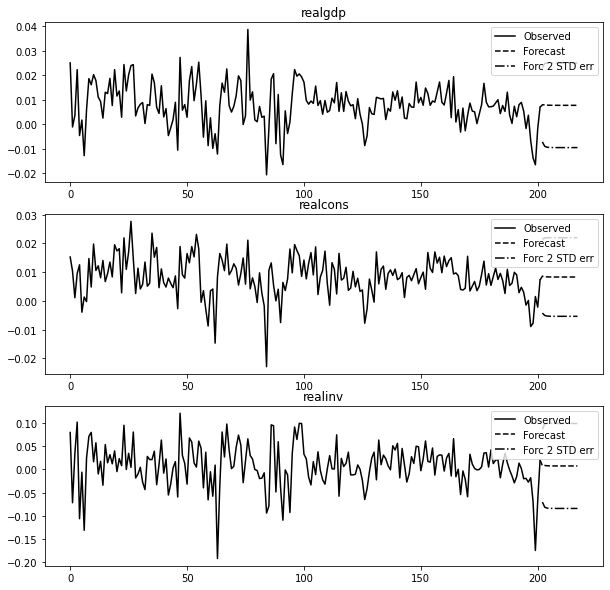

In [ ]:
# Objeto : programación orientada a objetos
# Objeto VAR_fit.metodo()
fore_var1 = var1.plot_forecast(steps=16)

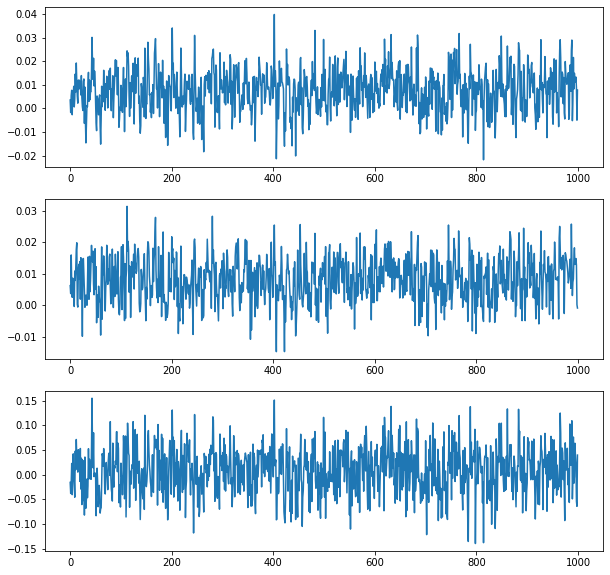

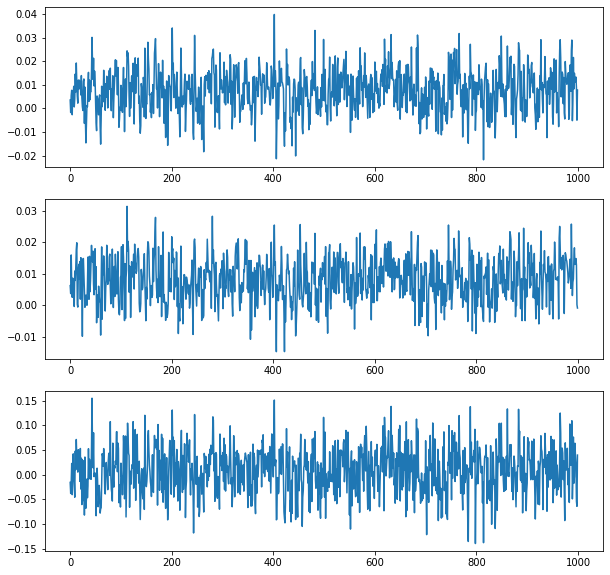

In [ ]:
var1.plotsim()

## Descomposición de la varianza del error

In [ ]:
fevd=var1.fevd(periods=12)
fevd.__class__

statsmodels.tsa.vector_ar.var_model.FEVD

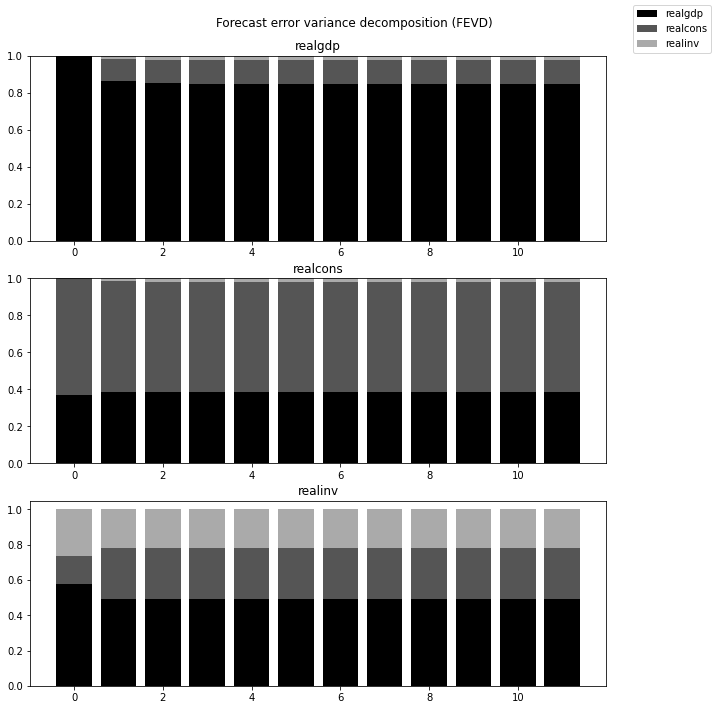

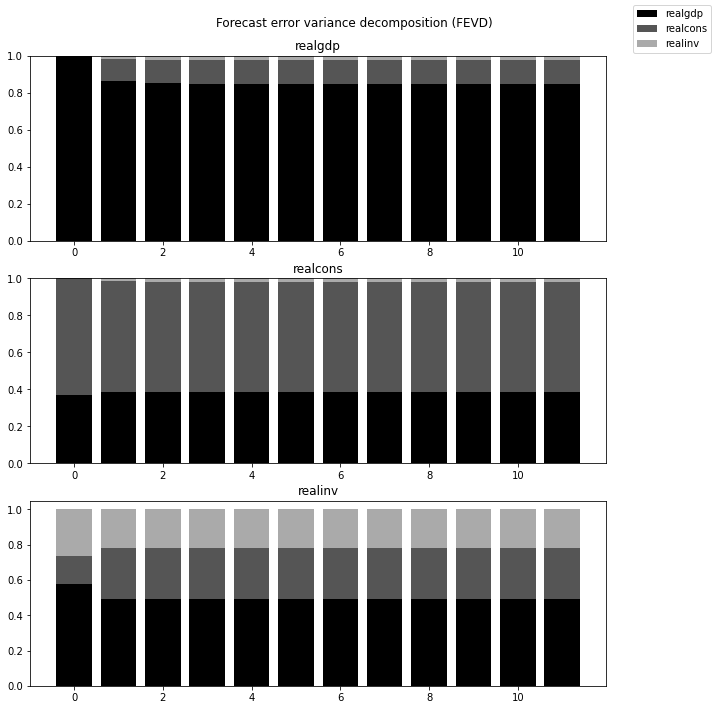

In [ ]:
# Objeto fevd = statsmodels.tsa.vector_ar.var_model.FEVD
fevd.plot()

In [ ]:
from statsmodels.tsa.api import SVAR

In [ ]:
help(SVAR)

Help on class SVAR in module statsmodels.tsa.vector_ar.svar_model:

class SVAR(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  SVAR(endog, svar_type, dates=None, freq=None, A=None, B=None, missing='none')
 |  
 |  Fit VAR and then estimate structural components of A and B, defined:
 |  
 |  .. math:: Ay_t = A_1 y_{t-1} + \ldots + A_p y_{t-p} + B\var(\epsilon_t)
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      1-d endogenous response variable. The independent variable.
 |  dates : array-like
 |      must match number of rows of endog
 |  svar_type : str
 |      "A" - estimate structural parameters of A matrix, B assumed = I
 |      "B" - estimate structural parameters of B matrix, A assumed = I
 |      "AB" - estimate structural parameters indicated in both A and B matrix
 |  A : array-like
 |      neqs x neqs with unknown parameters marked with 'E' for estimate
 |  B : array-like
 |      neqs x neqs with unknown parameters marked with 'E' for estimate
 |  
 |  Refe